In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

In [3]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [5]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Buket
[nltk_data]     Fildisi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
stop_words.extend(['greenstoneplus','Source','Resources','Links'])

In [7]:
df= pd.read_excel('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/LinkedInParagraph.xlsx')
df.head()

,Unnamed: 0,Context
0,0,SBTi recently published its fourth report titl...
1,1,Greenstone has curated an article that capture...
2,2,"Established in 2014, The Science Based Targets..."
3,3,"SBTi prioritises emission reduction, offering ..."
4,4,"""SBTi Monitoring Report 2022 - Looking back at..."


In [8]:
df=df.drop(df.columns[0], axis=1)
df.head()

,Context
0,SBTi recently published its fourth report titl...
1,Greenstone has curated an article that capture...
2,"Established in 2014, The Science Based Targets..."
3,"SBTi prioritises emission reduction, offering ..."
4,"""SBTi Monitoring Report 2022 - Looking back at..."


In [9]:
df['Context']=df['Context'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop_words)]))
df

,Context
0,"SBTi recently published fourth report titled ""..."
1,Greenstone curated article captures key insigh...
2,"Established 2014, Science Based Targets Initia..."
3,"SBTi prioritises emission reduction, offering ..."
4,"""SBTi Monitoring Report 2022 - Looking back 20..."
...,...
1548,Greenstone Gold Accredited CDP software partne...
1549,Using Greenstone’s software companies can:
1550,Define bespoke question sets range reporting f...
1551,"well software, Greenstone provides clients sup..."


In [10]:
df_list=df["Context"].values.tolist()
df_list

['SBTi recently published fourth report titled "SBTi Monitoring Report 2022 - Looking back 2022 moving forward 2023 beyond". comprehensive report delves worldwide advancements science-based targets reveals remarkable ongoing surge adoption science-targets companies financial institutions. trend persists despite escalating challenges prevalent global stage.',
 'Greenstone curated article captures key insights report.',
 'Established 2014, Science Based Targets Initiative (SBTi) collaboration among organisations including CDP, United Nations Global Compact, World Resources Institute (WRI), World Wide Fund Nature (WWF), Mean Business Coalition. assists global companies financial institutions setting science-based GHG emissions reduction targets, striving ambitious corporate climate action. SBTi mission involves aligning businesses climate science, cutting emissions, contributing goal limiting global warming 1.5°C.',
 'SBTi prioritises emission reduction, offering sector-specific guidance 

In [11]:
import string
import re
def text_clean_1(text):
    text = text.lower()
    text= text.replace(".  ",".");
    text= text.replace("'  ',","");
    text= text.replace(" '","'");
    text= text.replace("  ","");
    text= text.replace("▶ ","");
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    return text

In [12]:
text_clean_1(df_list[3])

'sbti prioritises emission reduction offering sectorspecific guidance highemission industries facilitating action areas like maritime aviation approach aims make ambitious climate action mainstream across sectors urging necessary transformations netzero world includes collaboration large companies supply chains sbti believes multipronged approach effectively accelerate private sector emissions reduction harmony paris agreement'

In [13]:
len(df_list)

1553

In [14]:
doc=[]
for i in range(len(df_list)):
    doc.append(text_clean_1(df_list[i]))
doc


['sbti recently published fourth report titled sbti monitoring report 2022  looking back 2022 moving forward 2023 beyond comprehensive report delves worldwide advancements sciencebased targets reveals remarkable ongoing surge adoption sciencetargets companies financial institutions trend persists despite escalating challenges prevalent global stage',
 'greenstone curated article captures key insights report',
 'established 2014 science based targets initiative sbti collaboration among organisations including cdp united nations global compact world resources institute wri world wide fund nature wwf mean business coalition assists global companies financial institutions setting sciencebased ghg emissions reduction targets striving ambitious corporate climate action sbti mission involves aligning businesses climate science cutting emissions contributing goal limiting global warming 15°c',
 'sbti prioritises emission reduction offering sectorspecific guidance highemission industries facili

In [15]:
type(doc)

list

In [16]:
doc[1]

'greenstone curated article captures key insights report'

In [17]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  
        # deacc=True removes punctuations

data_words = list(sent_to_words(doc))

print(data_words[:1])

[['sbti', 'recently', 'published', 'fourth', 'report', 'titled', 'sbti', 'monitoring', 'report', 'looking', 'back', 'moving', 'forward', 'beyond', 'comprehensive', 'report', 'delves', 'worldwide', 'advancements', 'sciencebased', 'targets', 'reveals', 'remarkable', 'ongoing', 'surge', 'adoption', 'sciencetargets', 'companies', 'financial', 'institutions', 'trend', 'persists', 'despite', 'escalating', 'challenges', 'prevalent', 'global', 'stage']]


In [18]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(doc, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[doc], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['sbti', 'recently', 'published', 'fourth', 'report', 'titled', 'sbti', 'monitoring', 'report', 'looking', 'back', 'moving', 'forward', 'beyond', 'comprehensive', 'report', 'delves', 'worldwide', 'advancements', 'sciencebased', 'targets', 'reveals', 'remarkable', 'ongoing', 'surge', 'adoption', 'sciencetargets', 'companies', 'financial', 'institutions', 'trend', 'persists', 'despite', 'escalating', 'challenges', 'prevalent', 'global', 'stage']


In [19]:
# Define functions for bigrams, trigrams and lemmatization
import io
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [20]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm")

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['recently', 'publish', 'fourth', 'report', 'title', 'sbti', 'monitoring', 'report', 'look', 'back', 'move', 'forward', 'comprehensive', 'report', 'delve', 'worldwide', 'advancement', 'sciencebase', 'target', 'reveal', 'remarkable', 'ongoing', 'surge', 'adoption', 'sciencetarget', 'company', 'financial', 'institution', 'trend', 'persist', 'escalate', 'challenge', 'prevalent', 'global', 'stage']]


In [21]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 3), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)]]


In [22]:
id2word[0]

'adoption'

In [23]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('adoption', 1),
  ('advancement', 1),
  ('back', 1),
  ('challenge', 1),
  ('company', 1),
  ('comprehensive', 1),
  ('delve', 1),
  ('escalate', 1),
  ('financial', 1),
  ('forward', 1),
  ('fourth', 1),
  ('global', 1),
  ('institution', 1),
  ('look', 1),
  ('monitoring', 1),
  ('move', 1),
  ('ongoing', 1),
  ('persist', 1),
  ('prevalent', 1),
  ('publish', 1),
  ('recently', 1),
  ('remarkable', 1),
  ('report', 3),
  ('reveal', 1),
  ('sbti', 1),
  ('sciencebase', 1),
  ('sciencetarget', 1),
  ('stage', 1),
  ('surge', 1),
  ('target', 1),
  ('title', 1),
  ('trend', 1),
  ('worldwide', 1)]]

In [45]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=2,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [46]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.028*"supplier" + 0.026*"datum" + 0.023*"scope" + 0.021*"chain" + 0.018*"supply" + 0.017*"emission" + 0.009*"risk" + 0.009*"need" + 0.009*"process" + 0.009*"category"'), (1, '0.028*"company" + 0.023*"report" + 0.015*"emission" + 0.014*"esg" + 0.013*"sustainability" + 0.009*"reporting" + 0.008*"climate" + 0.008*"impact" + 0.008*"include" + 0.008*"investor"')]


In [47]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.962270037232097

Coherence Score:  0.5214315394436824


In [28]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\Buket Fildisi\anaconda3\Lib\site-packages\pyLDAvis\_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.248893  0.287814       1        1  17.085145
8     -0.263531  0.031018       2        1  13.912848
6     -0.156126 -0.139311       3        1   9.949282
10    -0.146087 -0.222616       4        1   9.332353
5     -0.129856 -0.204699       5        1   7.546686
17    -0.108302 -0.066143       6        1   6.832823
1     -0.069468  0.004999       7        1   5.502101
15    -0.018894  0.016808       8        1   5.235554
12    -0.082271  0.134188       9        1   4.393709
11    -0.008694  0.046880      10        1   4.299846
14     0.018468  0.006842      11        1   4.200891
16     0.032803  0.111842      12        1   3.238753
3      0.083657 -0.005162      13        1   2.609447
4      0.121630 -0.022336      14        1   1.820418
2      0.137913  0.002417      15        1   1.458522
9      0.165389  0.003538      16        1   0.936036
0      0.163106  0.003381      17        1   0.591450
19     0.168524  0.003556      18        1   0.516822
13     0.167830  0.003518      19        1   0.366942
18     0.172802  0.003465      20        1   0.170372, topic_info=          Term        Freq       Total Category  logprob  loglift
52    emission  519.000000  519.000000  Default  30.0000  30.0000
162   supplier  539.000000  539.000000  Default  29.0000  29.0000
160      scope  361.000000  361.000000  Default  28.0000  28.0000
22      report  752.000000  752.000000  Default  27.0000  27.0000
111      datum  579.000000  579.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
819      water    0.014596    1.112399  Topic20  -8.2436   2.0414
1190    submit    0.014596    1.112450  Topic20  -8.2436   2.0414
1184    fiscal    0.014595    1.112205  Topic20  -8.2437   2.0415
1600   version    0.014596    1.112516  Topic20  -8.2436   2.0413
897       able    0.014595    1.112435  Topic20  -8.2437   2.0413

[835 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
196       9  0.738183      accept
260       6  0.855890      access
260      13  0.128384      access
107      11  0.920296  accessible
142       8  0.925081  accounting
...     ...       ...         ...
32       12  0.922915   worldwide
106       7  0.861504        year
106      11  0.115832        year
106      12  0.021719        year
141      12  0.756329  yearonyear

[610 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 9, 7, 11, 6, 18, 2, 16, 13, 12, 15, 17, 4, 5, 3, 10, 1, 20, 14, 19])

In [29]:
#Building LDA Mallet Model
#gensim version 4.3.0
#If your work depends on any of the modules below, feel free to copy it out of Gensim 3.8.3 (the last release where they appear), and extend & maintain the wrapper yourself.
#import os
#from gensim.models.wrappers import LdaMallet
#mallet_path = 'C:/Users/Buket Fildisi/mallet-2.0.8/bin/mallet' # update this path
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [30]:
#How to find optimal number of topic


In [31]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics)
        #gensim.models.wrappers.LdaMallet( corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [32]:
# Takes a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

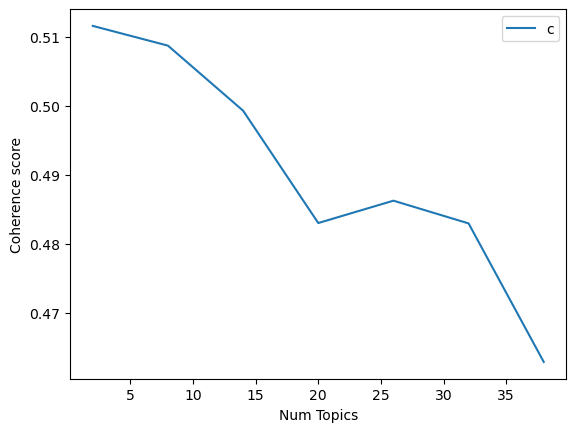

In [33]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [34]:
#If the coherence score seems to keep increasing, 
#it may make better sense to pick the model that gave the highest CV before flattening out.
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5116
Num Topics = 8  has Coherence Value of 0.5087
Num Topics = 14  has Coherence Value of 0.4993
Num Topics = 20  has Coherence Value of 0.483
Num Topics = 26  has Coherence Value of 0.4862
Num Topics = 32  has Coherence Value of 0.483
Num Topics = 38  has Coherence Value of 0.4629


In [37]:
# Select the model and print the topics
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(0, '0.019*"company" + 0.017*"supplier" + 0.015*"datum" + 0.013*"sustainability" + 0.012*"report" + 0.011*"esg" + 0.009*"emission" + 0.008*"chain" + 0.008*"risk" + 0.008*"organisation"'), (1, '0.017*"report" + 0.017*"emission" + 0.014*"company" + 0.012*"sustainability" + 0.010*"datum" + 0.010*"esg" + 0.010*"software" + 0.009*"organisation" + 0.008*"scope" + 0.008*"business"')]


In [38]:
visOpt = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
visOpt
#we can see the optimal topic number 

C:\Users\Buket Fildisi\anaconda3\Lib\site-packages\pyLDAvis\_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.016403  0.0       1        1  55.396778
1     -0.016403  0.0       2        1  44.603222, topic_info=           Term        Freq       Total Category  logprob  loglift
162    supplier  372.000000  372.000000  Default  30.0000  30.0000
52     emission  399.000000  399.000000  Default  29.0000  29.0000
22       report  474.000000  474.000000  Default  28.0000  28.0000
432        sasb   47.000000   47.000000  Default  27.0000  27.0000
267         cdp   76.000000   76.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
78        chain   83.061081  231.988452   Topic2  -5.1646  -0.2197
96       supply   75.190361  196.687432   Topic2  -5.2642  -0.1542
36   greenstone   58.961963  119.710886   Topic2  -5.5073   0.0992
45      climate   61.728462  145.892430   Topic2  -5.4615  -0.0528
162    supplier   71.410224  372.872871   Topic2  -5.3158  -0.8454

[199 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
750       1  0.828708  accountable
750       2  0.184157  accountable
345       1  0.328309     accurate
345       2  0.677138     accurate
671       1  0.921799        alert
...     ...       ...          ...
2848      2  0.721996         word
451       1  0.692072         work
451       2  0.298849         work
106       1  0.648693         year
106       2  0.340839         year

[284 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [48]:
#to find dominant topic in each doc
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_15188\1719133165.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_15188\1719133165.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
C:\Users\Buket Fildisi\AppData\Local\Temp\ipykernel_15188\1719133165.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=T

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.7302,"report, emission, company, sustainability, dat...","[recently, publish, fourth, report, title, sbt..."
1,1,0,0.8899,"company, supplier, datum, sustainability, repo...","[greenstone, curate, article, capture, key, in..."
2,2,1,0.7788,"report, emission, company, sustainability, dat...","[establish, science, base, target, initiative,..."
3,3,0,0.9645,"company, supplier, datum, sustainability, repo...","[sbti, prioritise, emission, reduction, offer,..."
4,4,0,0.9036,"company, supplier, datum, sustainability, repo...","[sbti, monitoring, report, look, back, move, f..."
5,5,0,0.9312,"company, supplier, datum, sustainability, repo...","[datum, analyse, report, date, ensure, inclusi..."
6,6,1,0.9664,"report, emission, company, sustainability, dat...","[adoption, sciencebase, target, surge, surpass..."
7,7,0,0.8904,"company, supplier, datum, sustainability, repo...","[nearly, sbti, company, target, address, scope..."
8,8,1,0.9747,"report, emission, company, sustainability, dat...","[company, target, validate, sbtis, corporate, ..."
9,9,0,0.8347,"company, supplier, datum, sustainability, repo...","[large, count, company, establish, target, tra..."


In [49]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.7302,"report, emission, company, sustainability, dat...","[recently, publish, fourth, report, title, sbt..."
1,1,0,0.8899,"company, supplier, datum, sustainability, repo...","[greenstone, curate, article, capture, key, in..."
2,2,1,0.7788,"report, emission, company, sustainability, dat...","[establish, science, base, target, initiative,..."
3,3,0,0.9645,"company, supplier, datum, sustainability, repo...","[sbti, prioritise, emission, reduction, offer,..."
4,4,0,0.9036,"company, supplier, datum, sustainability, repo...","[sbti, monitoring, report, look, back, move, f..."
...,...,...,...,...,...
1548,1548,1,0.9786,"report, emission, company, sustainability, dat...","[accredit, cdp, software, partner, greenstone,..."
1549,1549,1,0.7872,"report, emission, company, sustainability, dat...","[use, greenstone, software, company]"
1550,1550,1,0.9580,"report, emission, company, sustainability, dat...","[define, bespoke, question, set, range, report..."
1551,1551,1,0.5962,"report, emission, company, sustainability, dat...","[software, greenstone, provide, client, suppor..."


In [50]:
df_dominant_topic.to_excel('C:/Users/Buket Fildisi/Desktop/BCU/Dissertation/DEV/DATA/LinkedIn_paragraph.xlsx')

In [51]:
#Topic Distribution 
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,1,"report, emission, company, sustainability, dat...",908.0,0.5847
1,0,"company, supplier, datum, sustainability, repo...",645.0,0.4153
2,1,"report, emission, company, sustainability, dat...",NaN,NaN
3,0,"company, supplier, datum, sustainability, repo...",NaN,NaN
4,0,"company, supplier, datum, sustainability, repo...",NaN,NaN
...,...,...,...,...
1548,1,"report, emission, company, sustainability, dat...",NaN,NaN
1549,1,"report, emission, company, sustainability, dat...",NaN,NaN
1550,1,"report, emission, company, sustainability, dat...",NaN,NaN
1551,1,"report, emission, company, sustainability, dat...",NaN,NaN


In [52]:
d = df_dominant_topics['Topic_Keywords'].tolist()
wordclouddeneme= ' '.join(map(str, d)) 
wordclouddeneme

'report, emission, company, sustainability, datum, esg, software, organisation, scope, business company, supplier, datum, sustainability, report, esg, emission, chain, risk, organisation report, emission, company, sustainability, datum, esg, software, organisation, scope, business company, supplier, datum, sustainability, report, esg, emission, chain, risk, organisation company, supplier, datum, sustainability, report, esg, emission, chain, risk, organisation company, supplier, datum, sustainability, report, esg, emission, chain, risk, organisation report, emission, company, sustainability, datum, esg, software, organisation, scope, business company, supplier, datum, sustainability, report, esg, emission, chain, risk, organisation report, emission, company, sustainability, datum, esg, software, organisation, scope, business company, supplier, datum, sustainability, report, esg, emission, chain, risk, organisation report, emission, company, sustainability, datum, esg, software, organisa

In [53]:
from wordcloud import WordCloud, STOPWORDS

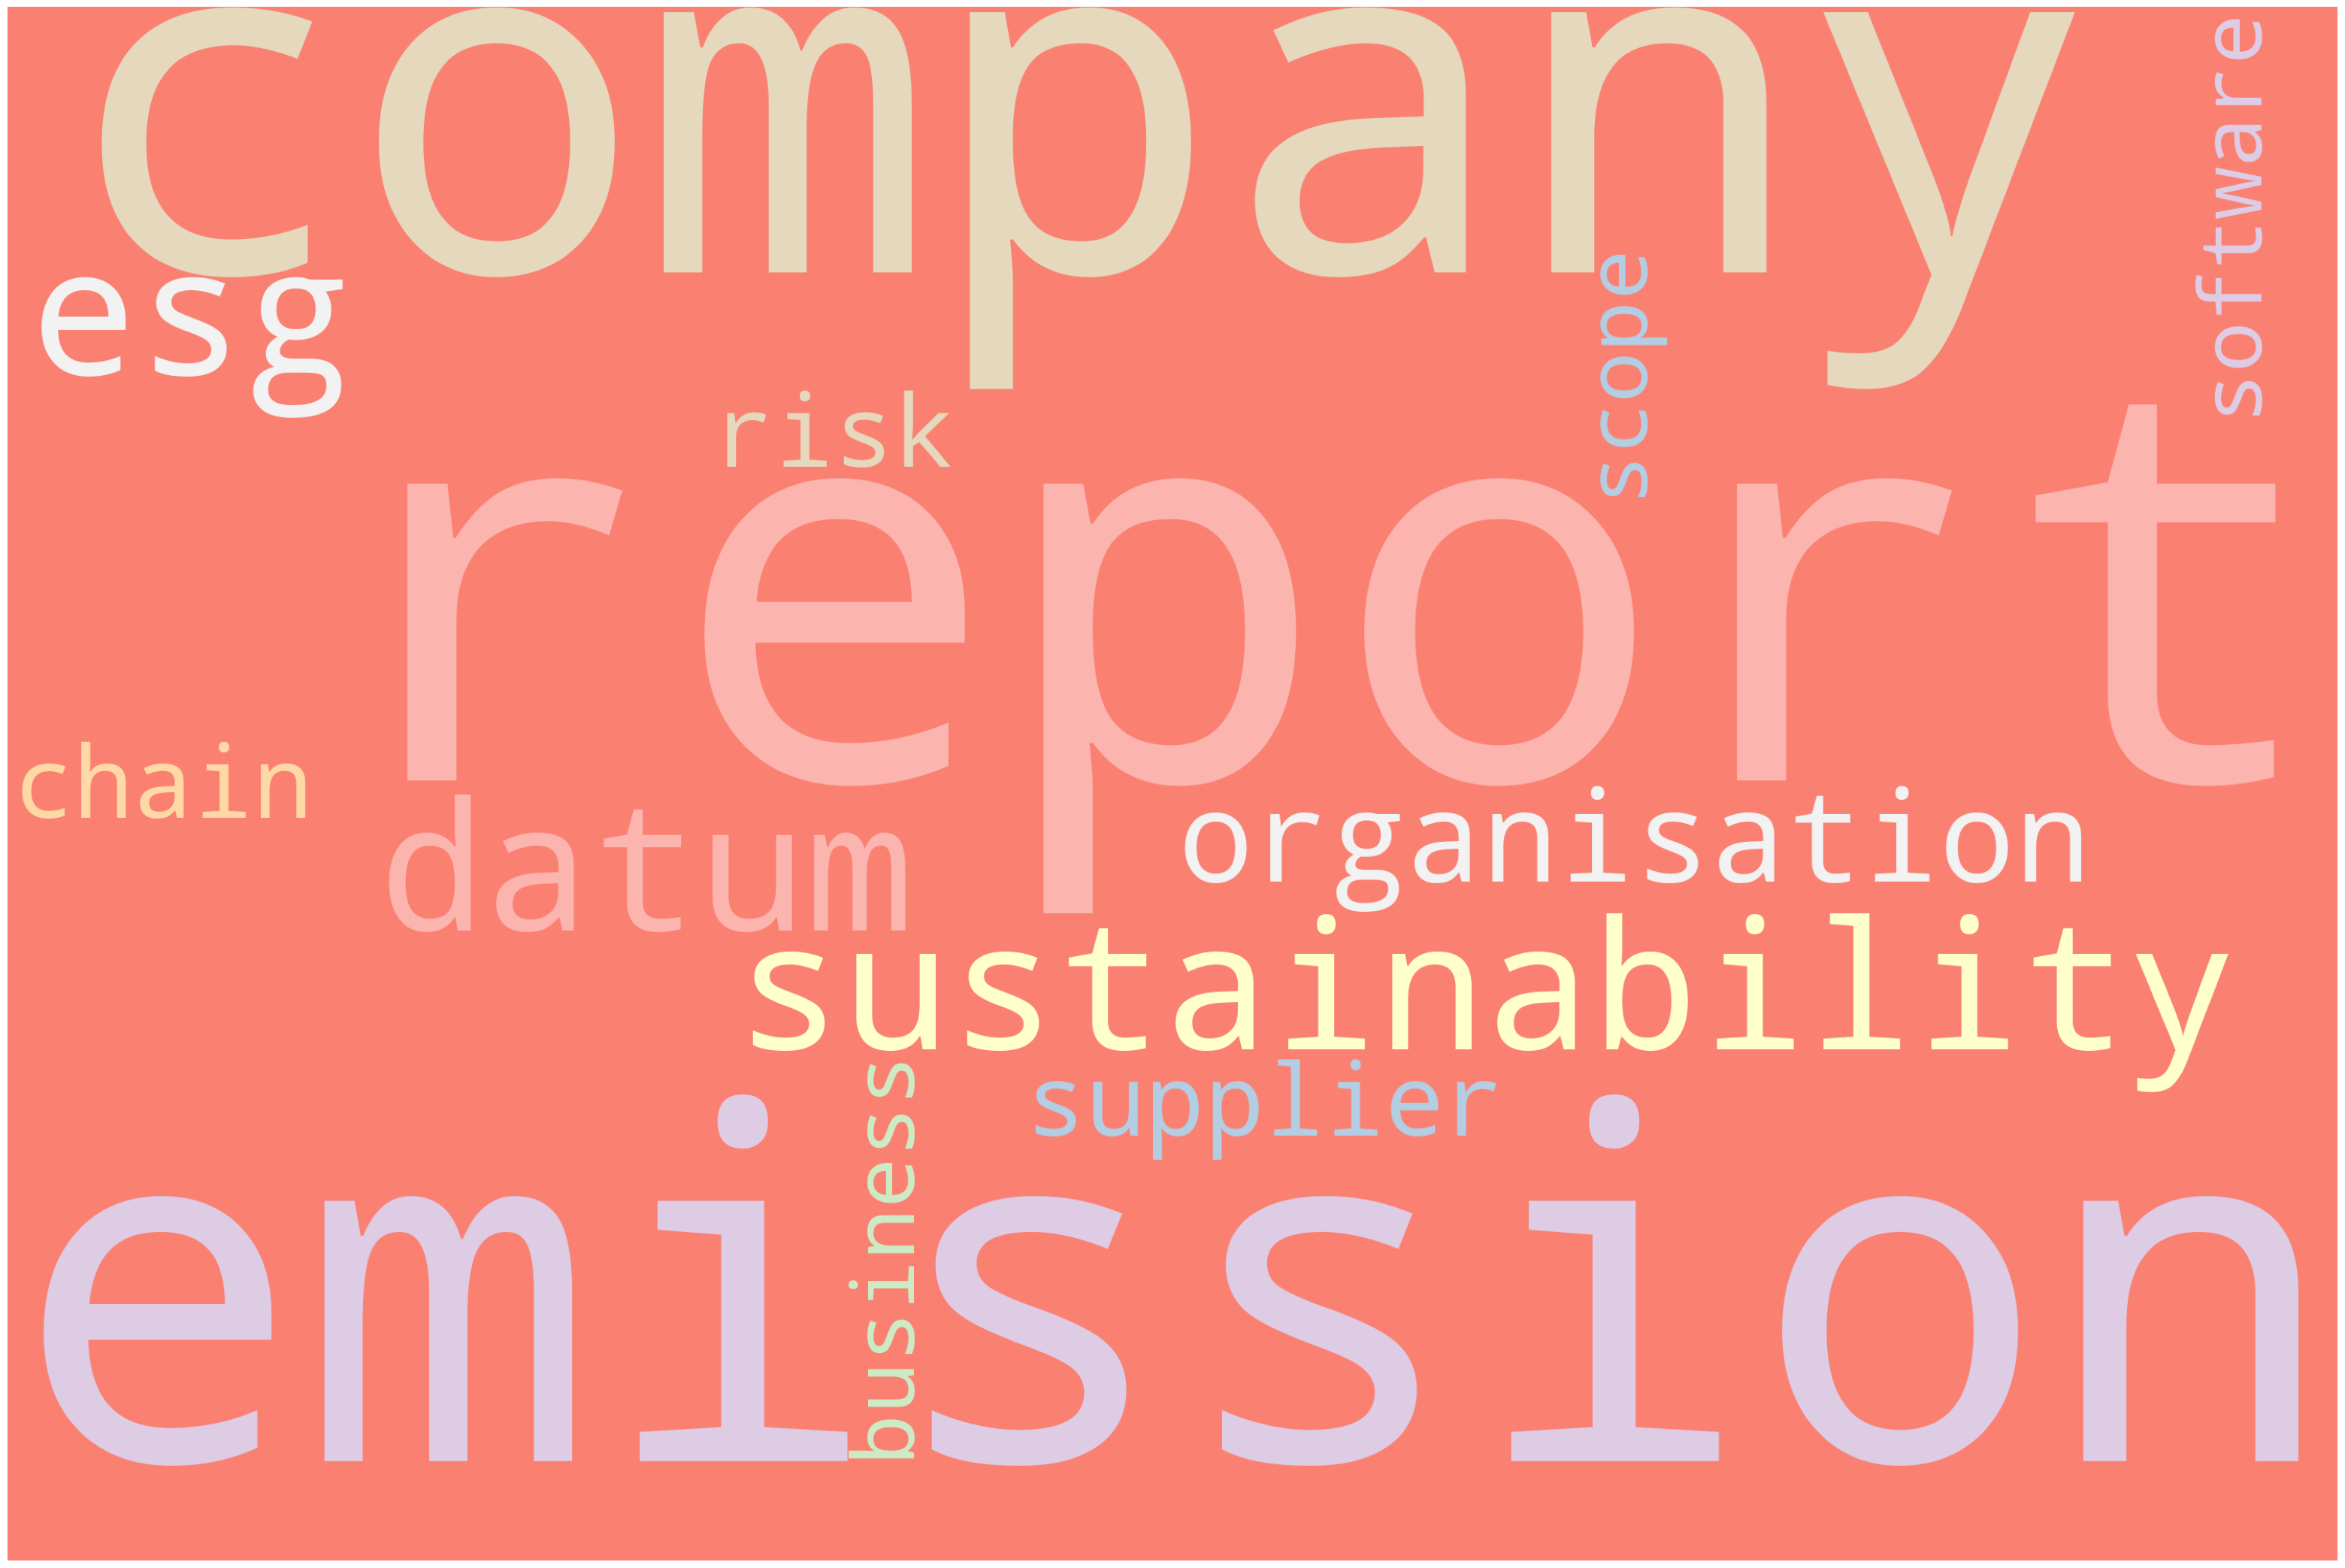

In [54]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
# Import package

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = stop_words).generate(wordclouddeneme)
# Plot
plot_cloud(wordcloud)

In [55]:
y=df_dominant_topic['Keywords'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
print(y)
keywords_list = [keyword for sublist in y for keyword in sublist]
print(keywords_list)
# Count the occurrences of each keyword
keyword_counts = pd.Series(keywords_list).value_counts()
print(keyword_counts)

0       [report, emission, company, sustainability, da...
1       [company, supplier, datum, sustainability, rep...
2       [report, emission, company, sustainability, da...
3       [company, supplier, datum, sustainability, rep...
4       [company, supplier, datum, sustainability, rep...
                              ...                        
1548    [report, emission, company, sustainability, da...
1549    [report, emission, company, sustainability, da...
1550    [report, emission, company, sustainability, da...
1551    [report, emission, company, sustainability, da...
1552    [company, supplier, datum, sustainability, rep...
Name: Keywords, Length: 1553, dtype: object
['report', 'emission', 'company', 'sustainability', 'datum', 'esg', 'software', 'organisation', 'scope', 'business', 'company', 'supplier', 'datum', 'sustainability', 'report', 'esg', 'emission', 'chain', 'risk', 'organisation', 'report', 'emission', 'company', 'sustainability', 'datum', 'esg', 'software', 'organisat

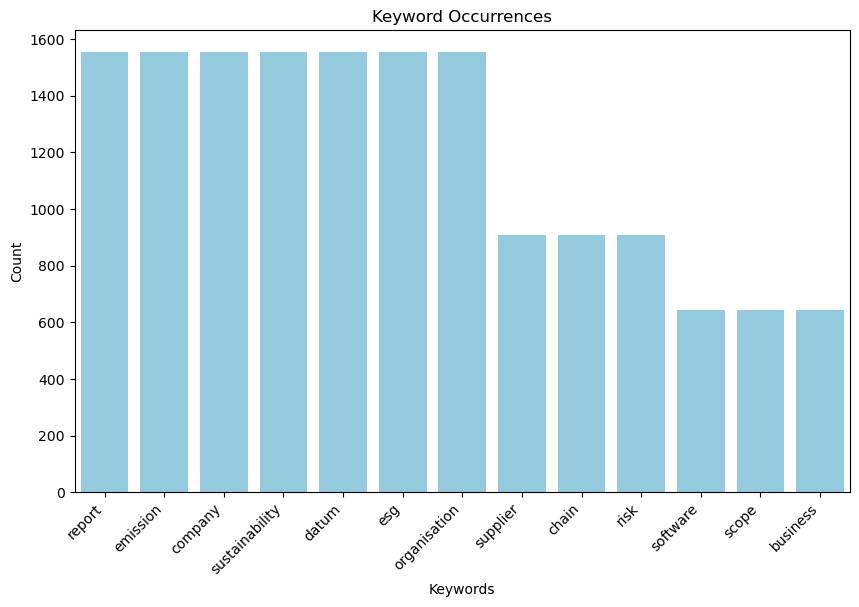

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=keyword_counts.index, y=keyword_counts.values, color='skyblue')
plt.title('Keyword Occurrences')
plt.xlabel('Keywords')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()